## ローパスフィルタの自作関数

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def lowpassFilter(img, msize=30):
  dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  rows, cols = img.shape
  crow, ccol = rows // 2 , cols // 2

  # create a mask first, center square is 1, remaining all zeros
  mask = np.zeros((rows, cols, 2), np.uint8)
  mask[crow-msize : crow+msize, ccol-msize : ccol+msize] = 1

  # apply mask and inverse DFT
  fshift = dft_shift * mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

  # 0~255で正規化
  img_back_max = img_back.max()
  img_back2 = (img_back * 255) / img_back_max
  img_back2 = img_back2.astype(np.uint8)

  return img_back2

## 画像プロットの自作関数

In [4]:
def plotImg(noise, imp, org, plt, noimg=False, nopsnr=False):
  matplotlib.rcParams["font.family"] = "Meiryo"
  if not noimg:
    # 画像をプロット
    fig, ax = plt.subplots(1, 3, figsize=(12,5))
    ax[0].imshow(org, cmap="gray"), ax[0].set_title("元画像")
    ax[1].imshow(noise, cmap="gray"), ax[1].set_title("ノイズ付き画像")
    ax[2].imshow(imp, cmap="gray"), ax[2].set_title("ノイズ除去後画像")
    fig.tight_layout()
    fig.show()
    
  noise_psnr = cv2.PSNR(org, noise)
  imp_psnr = cv2.PSNR(org, imp)
  if not nopsnr:
    # PSNRを表示
    print("noize PSNR =", noise_psnr)
    print("improvement PSNR =", imp_psnr)
    print("diff PSNR = ", imp_psnr-noise_psnr)

  return imp_psnr - noise_psnr

## ローパスフィルタ

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

psnrs = []
masks = []

for i in range(1, 20):
  dst = lowpassFilter(noise, i*5)
  psnrs.append(plotImg(noise, dst, org, plt))
  masks.append(i*5)
  print("mask size =", i*5)

plt.plot(masks, psnrs)
plt.show()

## ガウシアンフィルタ

In [ ]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

stddev = np.std(noise)

for i in range(1, 10, 2):
  dst = cv2.GaussianBlur(noise, ksize=(i, i), sigmaX = int(stddev))

  plotImg(noise, dst, org, plt)
  print("ksize=", (i, i))


## メディアンフィルタ

In [ ]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

for i in range(1, 10, 2):
  dst = cv2.medianBlur(noise, i)

  plotImg(noise, dst, org, plt)
  print("ksize=", (i, i))


## オープニング

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

for i in range(1, 10, 2):
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(i, i))
  opening = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)
  plotImg(noise, opening, org, plt)
  print("ksize=", (i, i))


## クロージング

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

for i in range(1, 10, 2):
  kernel = np.ones((i,i), np.uint8)
  opening = cv2.morphologyEx(noise, cv2.MORPH_CLOSE, kernel)
  plotImg(noise, opening, org, plt)
  print("ksize=", (i, i))

## ローパスフィルタ + メディアンフィルタ

noize PSNR = 12.877533435267953
improvement PSNR = 20.071488597018377
diff PSNR =  7.193955161750424


7.193955161750424

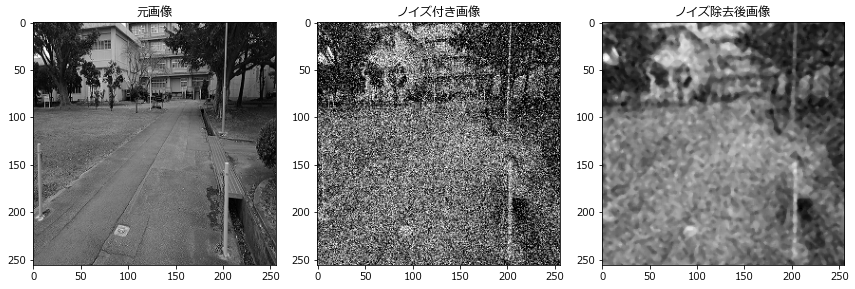

In [4]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

dst1 = lowpassFilter(noise, 52)

dst2 = cv2.medianBlur(dst1, 5)

# 画像をプロット
plotImg(noise, dst2, org, plt)

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

dst1 = lowpassFilter(noise, 50)

dst2 = cv2.GaussianBlur(dst1, ksize=(5, 5), sigmaX = 10)

# 画像をプロット
plotImg(noise, dst2, org, plt)

## メディアンフィルタのカーネルサイズの最適化

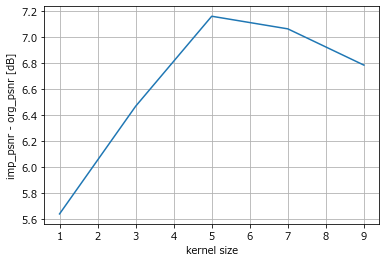

max kernel = 5
max psnrs = 7.160004542561921


In [6]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

kernel = []
psnrs = []

for k in range(1, 10, 2):
  dst1 = lowpassFilter(noise, 50)

  dst2 = cv2.medianBlur(dst1, k)

  # print("mask =", m)
  psnrs.append(plotImg(noise, dst2, org, plt, True, True))
  kernel.append(k)

plt.plot(kernel, psnrs)
plt.grid(":")
plt.xlabel("kernel size")
plt.ylabel("imp_psnr - org_psnr [dB]")
plt.show()

maxi = reduce(lambda a, b: a if psnrs[a] > psnrs[b] else b, range(len(psnrs)))
print("max kernel =", kernel[maxi])
print("max psnrs =", psnrs[maxi])

## メディアンフィルタ適用時のローパスフィルタを最適化

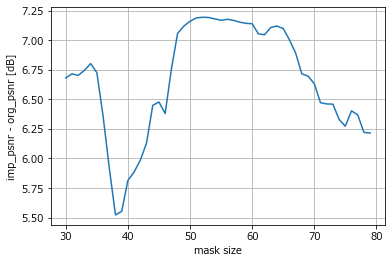

max masks = 52
max psnrs = 7.193955161750424


In [8]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

masks = []
psnrs = []

for m in range(30, 80, 1):
  dst1 = lowpassFilter(noise, m)

  dst2 = cv2.medianBlur(dst1, 5)

  # print("mask =", m)
  psnrs.append(plotImg(noise, dst2, org, plt, True, True))
  masks.append(m)

plt.plot(masks, psnrs)
plt.grid(":")
plt.xlabel("mask size")
plt.ylabel("imp_psnr - org_psnr [dB]")
plt.show()

maxi = reduce(lambda a, b: a if psnrs[a] > psnrs[b] else b, range(len(psnrs)))
print("max masks =", masks[maxi])
print("max psnrs =", psnrs[maxi])

## バイラテラルフィルタ適用時のローパスフィルタの最適化

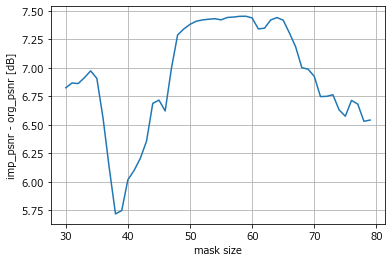

max masks = 59
max psnrs = 7.452881863364087


In [9]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

masks = []
psnrs = []

for m in range(30, 80, 1):
  dst1 = lowpassFilter(noise, m)

  dst2 = cv2.bilateralFilter(dst1, 8, 56, 69)

  # print("mask =", m)
  psnrs.append(plotImg(noise, dst2, org, plt, True, True))
  masks.append(m)

plt.plot(masks, psnrs)
plt.grid(":")
plt.xlabel("mask size")
plt.ylabel("imp_psnr - org_psnr [dB]")
plt.show()

maxi = reduce(lambda a, b: a if psnrs[a] > psnrs[b] else b, range(len(psnrs)))
print("max masks =", masks[maxi])
print("max psnrs =", psnrs[maxi])

## バイラテラルフィルタ

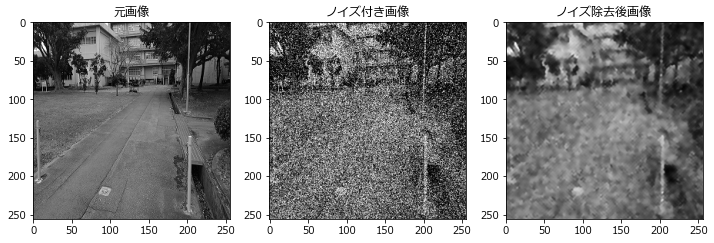

noize PSNR = 12.877533435267953
improvement PSNR = 20.33041529863204
diff PSNR =  7.452881863364087


7.452881863364087

In [7]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

dst1 = lowpassFilter(noise, 59)

dst2 = cv2.bilateralFilter(dst1, 8, 56, 69)

# 画像をプロット
plotImg(noise, dst2, org, plt)

## バイラテラルフィルタの最適なsigma colorとsigma space

sc = 56
ss = 69
max(psnr) = 7.418135


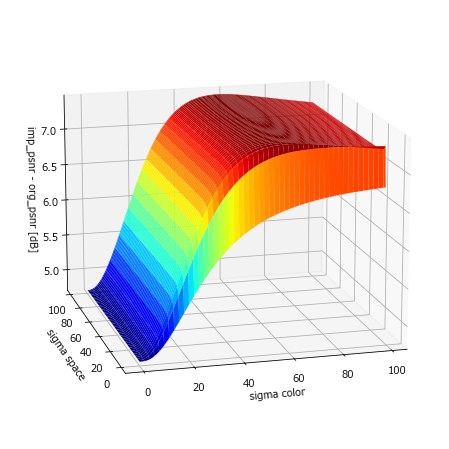

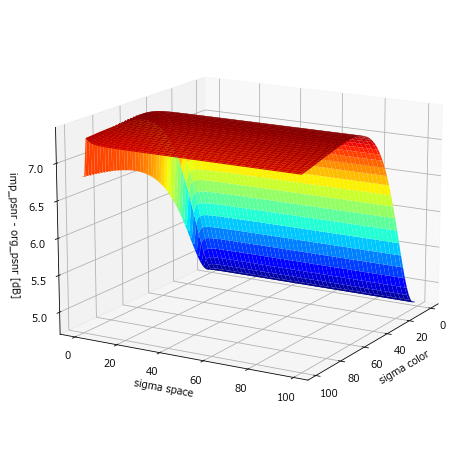

In [11]:
# %matplotlib ipympl
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

sc = np.arange(0, 100, 1)
ss = np.arange(0, 100, 1)
SC, SS = np.meshgrid(sc, ss)
psnrs = SC.astype(np.float32)


maxsc = 0
maxss = 0
maxpsnr = 0

for i in range(len(psnrs)):
  for j in range(len(psnrs[i])):
    dst1 = lowpassFilter(noise, 65)

    dst2 = cv2.bilateralFilter(dst1, 8, SC[i][j], SS[i][j])

    psnrs[i][j] = plotImg(noise, dst2, org, plt, True, True)
    
    if maxpsnr < psnrs[i][j]:
      maxsc = SC[i][j]
      maxss = SS[i][j]
      maxpsnr = psnrs[i][j]

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")

# ax.plot_surface(SC, SS, psnrs, cmap="summer")
ax.plot_surface(SC, SS, psnrs, cmap="jet")
ax.set_xlabel("sigma color")
ax.set_ylabel("sigma space")
ax.set_zlabel("imp_psnr - org_psnr [dB]")
ax.view_init(elev=15, azim=-105)
fig.show()


fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(SC, SS, psnrs, cmap="jet")
ax.set_xlabel("sigma color")
ax.set_ylabel("sigma space")
ax.set_zlabel("imp_psnr - org_psnr [dB]")
ax.view_init(elev=15, azim=30)
fig.show()

print("sc =", maxsc)
print("ss =", maxss)
print("max(psnr) =", maxpsnr)